In [2]:
import librosa as lr
import numpy as np
import scipy.signal as signal
import soundfile as sf
import matplotlib.pyplot as plt

In [7]:
import IPython.display as ipd

In [5]:
import io

In [8]:

# Replace the path with the correct path to your file
filepath = 'C:\\Users\\chorj\\Downloads\\WavFiles\\ICT_Project'

input_file = filepath + '\\MR_2.mp3'

audio, sr = sf.read(input_file)
# Convert to mono for convenience
mono_audio = audio.mean(axis=1)

"""
def to_wav(input_file, str):
    output_file = str + '.wav'
    # Load the audio file
    audio, sr = sf.read(input_file)
    sf.write(output_file, audio, sr)
# Save the audio as a WAV file
    return output_file
# Loading the audio file with librosa
"""

#audio, sr = lr.load(filepath, sr=None)
print(type(mono_audio))
ipd.Audio(mono_audio, rate=sr)

<class 'numpy.ndarray'>


In [9]:
audio_data, sr = lr.load(input_file, sr=None)
ipd.Audio(audio_data, rate=sr)
audio_mono = lr.to_mono(audio_data)
lr.get_duration(y = audio_mono, sr=sr)

9.769795918367347

In [10]:
audio_mono_mono = lr.to_mono(audio_mono)

In [ ]:
# Librosa Audio Sample Rate를 받고 waveform visualization 반환
def show_waveform(audio, sr):

    fig, ax = plt.subplots()
    time = lr.samples_to_time(range(len(audio)), sr=sr)
    ax.plot(time, audio)
    ax.set(xlabel = 'Time (s)', ylabel = 'Sound Amplitude')

    plt.show()

show_waveform(audio_mono, sr)

In [85]:
#노래 사이의 샘플 영역을 자름
def cut_audio(audio, sr, start_sec, end_sec):
    start_sample = int(start_sec * sr)
    end_sample = int(end_sec * sr)
    # Extract the desired segment
    segment = audio[start_sample:end_sample]
    return segment

cut_audio = cut_audio(audio_mono, sr, 3, 6)

ipd.Audio(cut_audio, rate=sr)

In [ ]:
#시작과 끝 지점이 적절한지 판단
def validate_start_end(full, start, end):
    if start < 0:
        raise ValueError('Start time must be greater than 0')
        return False
    if end >= (full - 1):
        raise ValueError('End time must be less than the duration of the audio file')
        return False
    if end - start > 30:
        raise ValueError('Segment length must be less than or equal to 30 seconds')
        return False
    if start >= end:
        raise ValueError('End time must be greater than start time')
        return False
    return True

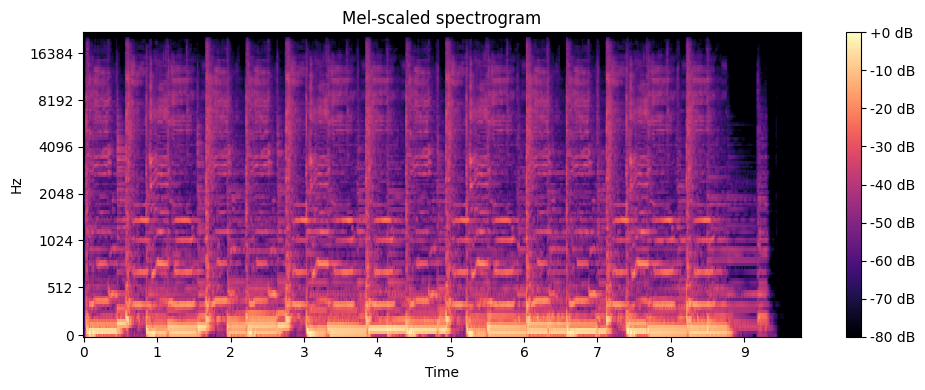

In [11]:
# Compute a Mel-scaled spectrogram
S = lr.feature.melspectrogram(y = mono_audio, sr=sr)

# Convert to log scale (dB)
D = lr.power_to_db(S, ref=np.max)

# Display the spectrogram
plt.figure(figsize=(10, 4))
lr.display.specshow(D, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-scaled spectrogram')
plt.tight_layout()
plt.show()

In [12]:

# Design a peaking EQ filter to boost 7 kHz
ratio = 30
Q = 1.0  # Quality factor
gain = 3  # Gain in dB
freq = 7000  # Frequency to boost
b, a = signal.iirpeak(freq/(sr/2), Q, gain)

# Apply the filter
audio_filtered = signal.lfilter(b, a, audio_mono)

audio_sum = 0.4*audio_filtered+ 0.6*audio_mono
# Save the filtered audio
sf.write('your_audio_file_filtered.wav', audio_sum, sr)
ipd.Audio('your_audio_file_filtered.wav')

In [72]:
#Boost 7kHz by 3dB
def audio_addAir(input_audio, ratio):
    ratioMod = float(ratio)/100
    Q = 1.0  # Quality factor
    gain = 3  # Gain in dB
    freq = 7000 
    # Design a peaking EQ filter to boost 7 kHz
    b, a = signal.iirpeak(freq / (sr / 2), Q, gain)

    # Apply the filter
    audio_filtered = signal.lfilter(b, a, input_audio)

    audio_sum = ratioMod * audio_filtered + (1-ratioMod) * input_audio
    # Save the filtered audio
    sf.write('your_audio_file_filtered.wav', audio_sum, sr)

    return audio_sum

Audio(audio_addAir(mono_audio, 50), rate=sr)

In [80]:
# Sum the original audio with the pitch shifted audio
def audio_addOctaveHigher(input_audio, ratio):
    ratioMod = float(ratio)/100
# Pitch shift the audio by 12 semitones (1 octave)
    octave_higher_audio = lr.effects.pitch_shift(mono_audio, sr = sr, n_steps=12)

# Save the pitch-shifted audio
    audio_sum = ratioMod * octave_higher_audio + (1-ratioMod) * input_audio
    return audio_sum

Audio(audio_addOctaveHigher(mono_audio, 50), rate=sr)

def audio_addOctaveLower(input_audio, ratio):
    ratioMod = float(ratio)/100
# Pitch shift the audio by 12 semitones (1 octave)
    octave_lower_audio = lr.effects.pitch_shift(mono_audio, sr = sr, n_steps=-12)

# Save the pitch-shifted audio
    audio_sum = ratioMod * octave_lower_audio + (1-ratioMod) * input_audio
    return audio_sum
Audio(audio_addOctaveLower(mono_audio, 50), rate=sr)

In [ ]:
# return wav file from any  
y, sr = librosa.load('path_to_your_audio_file', sr=None)  # sr=None ensures original sampling rate is used

# Save the loaded audio as a WAV file
sf.write('output_file.wav', y, sr)


In [102]:
import os
from pydub import AudioSegment
def convert_m4a_to_wav(m4a_path):
    """
    Convert an M4A file to WAV format.
    """
    wav_path = os.path.splitext(m4a_path)[0] + '.wav'
    audio = AudioSegment.from_file(m4a_path, format="m4a")
    audio.export(wav_path, format="wav")
    return wav_path

input_file = filepath + '\\Hightake2.m4a'

wav_file = convert_m4a_to_wav(input_file)

# Now load with librosa
y, sr = lr.load(wav_file, sr=None)

audio.export("High take2.wav", format="wav")


C:\Users\chorj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pydub\utils.py:198: RuntimeWarning: Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work
  warn("Couldn't find ffprobe or avprobe - defaulting to ffprobe, but may not work", RuntimeWarning)


FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다

In [ ]:

def basic_compressor(signal, threshold, ratio, make_up_gain):
    """
    A basic compressor function.
    signal: Audio signal (numpy array).
    threshold: Threshold level (in linear amplitude) for the compressor.
    ratio: Compression ratio.
    make_up_gain: Make-up gain to be applied after compression (in linear amplitude).
    """
    # Applying basic compression (no attack, release, or knee)
    compressed_signal = np.copy(signal)
    for i in range(len(compressed_signal)):
        if abs(compressed_signal[i]) > threshold:
            compressed_signal[i] = threshold + (compressed_signal[i] - threshold) / ratio
        compressed_signal[i] *= make_up_gain
    return compressed_signal

def audio_Compressor(input_audio, ratio):
    ratioMod = float(ratio)/100
# Compression settings (example values, you should adjust these)
    threshold = 0.2  # Threshold (linear amplitude)
    ratio = 4        # Compression ratio
    make_up_gain = 1.5  # Make-up gain

# Apply compression
    compressed_audio = basic_compressor(input_audio, threshold, ratio, make_up_gain)

# Mix compressed audio with original (50/50 mix)
    audio_sum = ratioMod * input_audio + (1-ratioMod) * compressed_audio
    return audio_sum
# Save the resulting audio
sf.write('processed_audio.wav', mixed_audio, sr)

In [ ]:

# Load your vocal track (replace with your file path)
vocal, sr = librosa.load('your_vocal_track.wav', sr=None)

# Load an impulse response (replace with your file path)
ir, sr_ir = librosa.load('your_impulse_response.wav', sr=sr)  # Ensure same sample rate

# Convolve the vocal track with the impulse response
reverbed_vocal = scipy.signal.fftconvolve(vocal, ir, mode='full')

# Mix the reverbed signal with the original signal
# Adjust the 'reverb_ratio' to control the amount of reverb (0.0 to 1.0)
reverb_ratio = 0.5
mixed_signal = ((1 - reverb_ratio) * vocal) + (reverb_ratio * reverbed_vocal[:len(vocal)])

# Save the output
sf.write('vocal_with_reverb.wav', mixed_signal, sr)

In [ ]:
# Load the audio file
audio, sr = librosa.load('path_to_your_audio_file.wav', sr=None)

# Pitch shift the audio by 12 semitones (1 octave)
octave_higher_audio = librosa.effects.pitch_shift(audio, sr, n_steps=12)

# Save the pitch-shifted audio
sf.write('octave_higher_audio.wav', octave_higher_audio, sr)

In [ ]:
#https://github.com/JanWilczek/python-auto-tune/blob/main/auto_tune.py


In [ ]:
import soundfile as sf
import scipy.signal as signal

# Load the audio file
audio, sr = sf.read('path_to_your_audio_file.wav')

# Load the impulse response (replace 'path_to_your_impulse_response.wav' with the actual file path)
impulse_response, sr_ir = sf.read('path_to_your_impulse_response.wav')

# Apply reverb by convolving the audio with the impulse response
reverberated_audio = signal.fftconvolve(audio, impulse_response, mode='full')

# Adjust the decay rate (replace 'decay_rate' with the desired value)
decay_rate = 0.5
reverberated_audio *= decay_rate

# Adjust the wet ratio (replace 'wet_ratio' with the desired value)
wet_ratio = 0.5
mixed_audio = (1 - wet_ratio) * audio + wet_ratio * reverberated_audio

# Save the resulting audio
sf.write('output_file_with_reverb.wav', mixed_audio, sr)



In [29]:
#IE SN TF JP

sample_str = "I,30,4,E,0,-1,S,0,-1,N,50,3,T,20,2,F,10,5,J,35,6,P,15,1"

def parse(str):
    str = str.split(",")
    return str

def parse_into_three(str_origin):
    str = parse(str_origin)
    instruction = []
    degree = []
    order = []
    for i in range(len(str)):
        if i%3 ==0:
            instruction.append(str[i])
        elif i%3 ==1:
            degree.append(int(str[i]))
        else:
            order.append(int(str[i]))
    print("Instrcution: ", instruction)
    print("Degree: ", degree)
    print("Order: ", order)

    if len(instruction) == len(degree) == len(order):
        ans = {key: (degree[i], order[i]) for i, key in enumerate(instruction)}
    else:
        print("The lists are not of the same length.")
    return ans
    
def modify_dict(dict_origin):
    my_dict = dict_origin
    filtered_dict = {key: value for key, value in my_dict.items() if value[1] != -1}
    print(filtered_dict)
    sorted_dict = dict(sorted(filtered_dict.items(), key=lambda item: item[1][1]))
    print (sorted_dict)
    return sorted_dict

#원본 string을 받고 instruction, degree, order로 나눈 후 dict로 만드는 함수
def parse_process(str):
    return modify_dict(parse_into_three(str))

#dict과 원본값을 받은 이후 최종값과 그 과정을 출력하는 함수
def main_process(dict, object):
    ans = object
    submit = [ans]
    for key, value in dict.items():
        print("current value", value[0])
        if key == "I":
            ans = I(value[0], ans)
        elif key == "E":
            ans = E(value[0], ans)
        elif key == "S":
            ans = S(value[0], ans)
        elif key == "N":
            ans = N(value[0], ans)
        elif key == "T":
            ans = T(value[0], ans)
        elif key == "F":
            ans = F(value[0], ans)
        elif key == "J":
            ans = J(value[0], ans)
        elif key == "P":
            ans = P(value[0], ans)
        else:
            print("Invalid instruction")
        submit.append(ans)
    return submit

#def audio_addOctaveLower(input_audio, ratio): =
#def audio_addOctaveHigher(input_audio, ratio): =
#def audio_addAir(input_audio, ratio): =
#
def P(value, object):
    print("current object: ", object)
    print("P activated")
    return (object+value)
def T(value, object):
    print("current object: ", object)
    print("T activated")
    return (object*value)
def F(value, object):
    print("current object: ", object)
    print("F activated")
    return (object+value*object-value)
def J(value, object):
    print("current object: ", object)
    print("J activated")
    return (object-value)
def N(value, object):
    print("current object: ", object)
    print("N activated")
    return (object*value*value)
def S(value, object):
    print("current object: ", object)
    print("S activated")
    return (object*value/30)
def E(value, object):
    print("current object: ", object)
    print("E activated")
    return (object*value/20)
def I(value, object):
    print("current object: ", object)
    print("I activated")
    return (object*value/10)

main_process(parse_process(sample_str), 10)

Instrcution:  ['I', 'E', 'S', 'N', 'T', 'F', 'J', 'P']
Degree:  [30, 0, 0, 50, 20, 10, 35, 15]
Order:  [4, -1, -1, 3, 2, 5, 6, 1]
{'I': (30, 4), 'N': (50, 3), 'T': (20, 2), 'F': (10, 5), 'J': (35, 6), 'P': (15, 1)}
{'P': (15, 1), 'T': (20, 2), 'N': (50, 3), 'I': (30, 4), 'F': (10, 5), 'J': (35, 6)}
current value 15
current object:  10
P activated
current value 20
current object:  25
T activated
current value 50
current object:  500
N activated
current value 30
current object:  1250000
I activated
current value 10
current object:  3750000.0
F activated
current value 35
current object:  41249990.0
J activated


[10, 25, 500, 1250000, 3750000.0, 41249990.0, 41249955.0]

In [26]:
def main_process(dict, object):
    ans = object
    for key, value in dict.items():
        print("current value", value[0])
        if key == "I":
            ans = I(value[0], ans)
        elif key == "E":
            ans = E(value[0], ans)
        elif key == "S":
            ans = S(value[0], ans)
        elif key == "N":
            ans = N(value[0], ans)
        elif key == "T":
            ans = T(value[0], ans)
        elif key == "F":
            ans = F(value[0], ans)
        elif key == "J":
            ans = J(value[0], ans)
        elif key == "P":
            ans = P(value[0], ans)
        else:
            print("Invalid instruction")
    return ans

def P(value, object):
    print("current object: ", object)
    print("P activated")
    return (object+value)
def T(value, object):
    print("current object: ", object)
    print("T activated")
    return (object*value)
def F(value, object):
    print("current object: ", object)
    print("F activated")
    return (object+value*object-value)
def J(value, object):
    print("current object: ", object)
    print("J activated")
    return (object-value)
def N(value, object):
    print("current object: ", object)
    print("N activated")
    return (object*value*value)
def S(value, object):
    print("current object: ", object)
    print("S activated")
    return (object*value/30)
def E(value, object):
    print("current object: ", object)
    print("E activated")
    return (object*value/20)
def I(value, object):
    print("current object: ", object)
    print("I activated")
    return (object*value/10)

main_process(run, 10)

current value 15
current object:  10
P activated
current value 20
current object:  25
T activated
current value 50
current object:  500
N activated
current value 30
current object:  1250000
I activated
current value 10
current object:  3750000.0
F activated
current value 35
current object:  41249990.0
J activated


41249955.0